In [433]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [434]:
session_list = []
with open('capture_time.csv') as csvfile: #read session data from capture_time.csv
    readCSV = csv.reader(csvfile, delimiter='-')
    line_no = 0
    print "The data sessions taken during the start and end dates"
    for row in readCSV:
        if row[0] != '' and row[1] != '': #Check if both start and end times of each row exists
            starttime = datetime.strptime(row[0],'%Y/%m/%d %H:%M:%S.%f')
            endtime = datetime.strptime(row[1],'%Y/%m/%d %H:%M:%S.%f')
            #print starttime.date()
            if starttime.date() == video_startdatte.date() and endtime.date() == video_enddate.date(): #Check if sessions available which matches the startdate and enddate
                line_no = line_no + 1
                print "(", line_no, ")", "\t", starttime, "-", endtime, "\t", (endtime-starttime).seconds
                session_list.append(row[0] + "-" + row[1])

print "Please input the session number. Confirm the start and end times using the video."
session = raw_input("Session ") 
print "You have chosen the session ", session

The data sessions taken during the start and end dates
( 1 ) 	2019-05-01 16:41:05.611000 - 2019-05-01 16:41:13.163000 	7
( 2 ) 	2019-05-01 16:42:40.785000 - 2019-05-01 16:43:10.407000 	29
( 3 ) 	2019-05-01 16:43:45.472000 - 2019-05-01 16:44:57.964000 	72
( 4 ) 	2019-05-01 16:54:00.370000 - 2019-05-01 16:54:34.154000 	33
( 5 ) 	2019-05-01 17:09:03.935000 - 2019-05-01 17:13:19.206000 	255
( 6 ) 	2019-05-01 17:34:35.146000 - 2019-05-01 17:38:39.256000 	244
( 7 ) 	2019-05-01 17:54:56.137000 - 2019-05-01 17:58:14.905000 	198
( 8 ) 	2019-05-01 17:59:27.842000 - 2019-05-01 18:03:30.776000 	242
( 9 ) 	2019-05-01 18:32:31.120000 - 2019-05-01 18:36:21.541000 	230
( 10 ) 	2019-05-01 18:45:58.958000 - 2019-05-01 18:49:56.742000 	237
Please input the session number. Confirm the start and end times using the video.
Session 5
You have chosen the session  5


In [435]:
session_starttime = datetime.strptime(session_list[int(session)-1][0:23],'%Y/%m/%d %H:%M:%S.%f')
session_endtime = datetime.strptime(session_list[int(session)-1][24:47],'%Y/%m/%d %H:%M:%S.%f')
print "Start and end times for your selected session are as follows."
print "Start time = ",session_starttime
print "End time = ",session_endtime

Start and end times for your selected session are as follows.
Start time =  2019-05-01 17:09:03.935000
End time =  2019-05-01 17:13:19.206000


In [534]:
df_acc2 = pd.DataFrame()
df_acc_w = pd.DataFrame()
df_gyro = pd.DataFrame()
df_magnetic = pd.DataFrame()
results = []

for sensor in sensor_list:
    df = pd.DataFrame()
    for data_filename in os.listdir("data/" + sensor + "/" + video_start): #read data files from data folder
        data_filename = os.path.splitext(data_filename)[0]
        #print datetime.strptime(session_starttime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S')


        data_filename_datetime = datetime.strptime(data_filename[0:15],'%Y%m%d_%H%M%S')
        #print data_filename_datetime
        if data_filename_datetime >= datetime.strptime(session_starttime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S') and data_filename_datetime <= datetime.strptime(session_endtime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S'): #check if the file is in the selected session
            #samplerate, data = wavfile.read(stereo_path + wav_filename +'.wav')
            print "Reading file", data_filename
            if sensor!="wifi":
                df_temp = pd.read_csv("data/" + sensor + "/" + video_start + "/" + data_filename + ".csv")
                #df.index = df['time']
                df_temp.set_index('time', inplace = True)
                #display(df_temp.head())
                df = df.append(df_temp, ignore_index=False)
                
            if sensor=="wifi":
                with open("data/" + sensor + "/" + video_start + "/" + data_filename + ".csv") as csvfile:
                    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
                    for row in spamreader:
                        results.append(row)


    if sensor=="acc2":
        df_acc2=df
    if sensor=="acc_w":
        df_acc_w=df
    if sensor=="gyro":
        df_gyro=df
    if sensor=="magnetic":
        df_magnetic=df
    if sensor=="wifi":
        df_wifi=df
            
#df_acc2 = df_acc2.sort_values(by='time')
#df_acc_w = df_acc_w.sort_values(by='time')
#df_gyro = df_gyro.sort_values(by='time')
#df_magnetic = df_magnetic.sort_values(by='time')

df_acc2.sort_index(inplace=True)
df_acc_w.sort_index(inplace=True)
df_gyro.sort_index(inplace=True)
df_magnetic.sort_index(inplace=True)
#df_wifi = df_wifi.sort_values(by='time')
print "All the data files have been read, appended an sorted according to the time stamps"

Reading file 20190501_170930_acc_w
Reading file 20190501_171200_acc_w
Reading file 20190501_171130_acc_w
Reading file 20190501_171000_acc_w
Reading file 20190501_171030_acc_w
Reading file 20190501_171230_acc_w
Reading file 20190501_171100_acc_w
Reading file 20190501_171300_acc_w
Reading file 20190501_171300
Reading file 20190501_171000
Reading file 20190501_171100
Reading file 20190501_171200
All the data files have been read, appended an sorted according to the time stamps


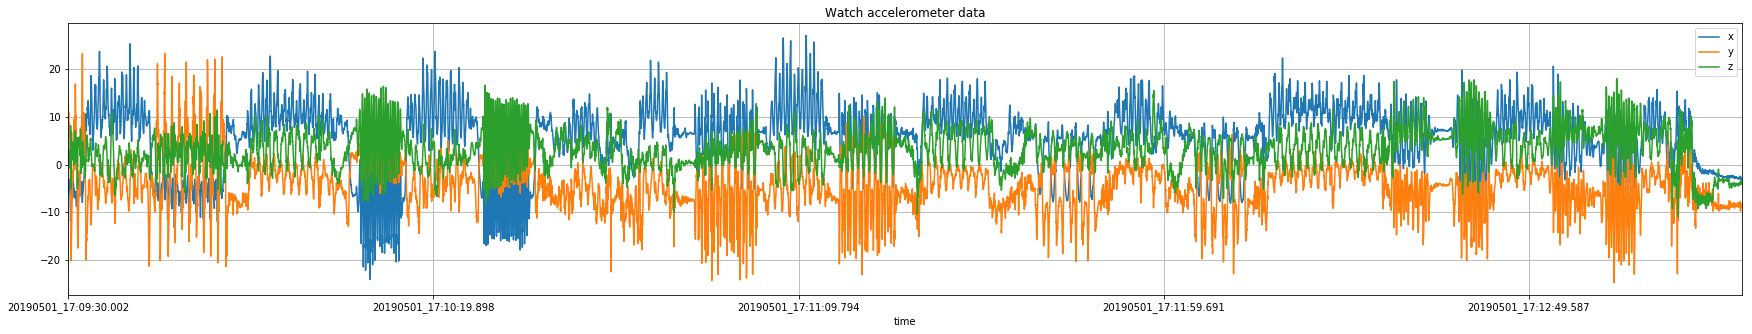

In [535]:
df_acc_w.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(df_acc_w)])

In [542]:
labels = pd.read_csv("env/" + str(session) + "/dat/" + "labels", header=None)
labels.drop([0], axis=1,inplace=True)

In [543]:
acc = pd.read_csv("env/" + str(session) + "/dat/" + "acc", header=None)
acc.drop([0], axis=1,inplace=True)

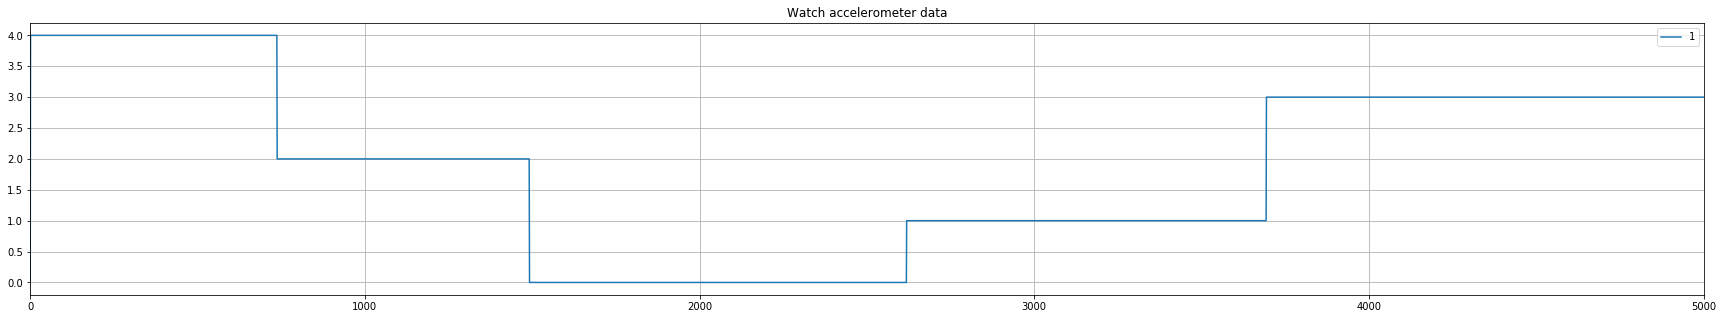

In [544]:
labels.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(labels)])

In [539]:
acc2 = np.array(df_acc_w)

# Acceleration PCA calculation

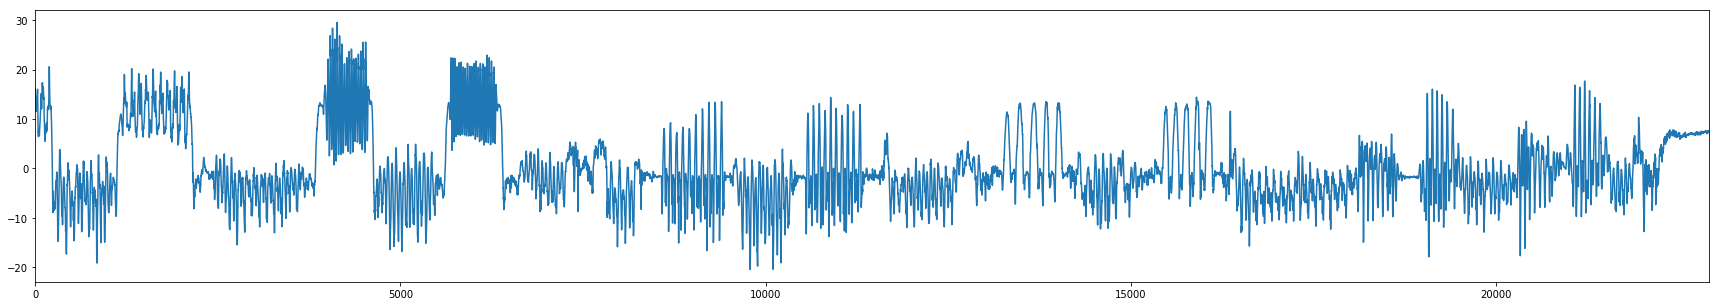

In [439]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
acc = pca.fit_transform(acc2)
acc1 = acc
acc1 = pd.DataFrame(acc1)
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc))
plt.plot(acc)
plt.show()

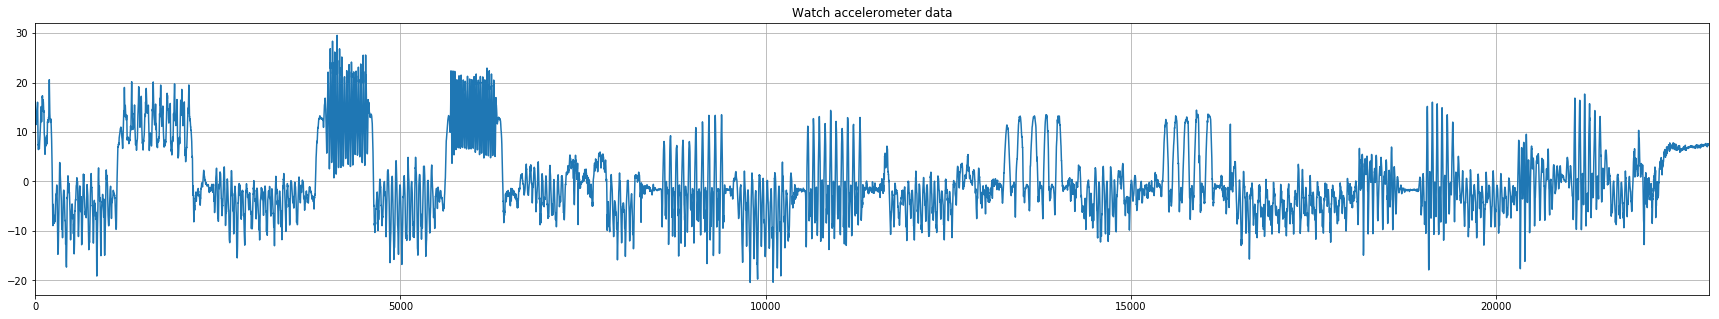

In [440]:
acc1.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)],legend=None)
plt.savefig("paper/"+ str(session) +"/acc.png")

In [441]:
count = 0 
for i in range (0,len(results)-1):
    for j in range (1,len(results[i])-1):
        print str(results[i][0]).split(",")[0].replace(" ", "")
        print str(results[i][j]).split(",")[1].replace(" ", "")
        print str(results[i][j]).split(",")[3].replace(" ", "")
    count=count+1
    print "**********" 

**********
20190501_17:13:01.846
BSSID:74:03:bd:3c:c6:30
level:-76
20190501_17:13:01.846
BSSID:34:3d:c4:1f:79:a1
level:-79
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:ad
level:-77
20190501_17:13:01.846
BSSID:34:3d:c4:e2:01:03
level:-80
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:ac
level:-77
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:af
level:-77
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:ae
level:-77
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:ab
level:-77
20190501_17:13:01.846
BSSID:34:3d:c4:e2:01:02
level:-71
20190501_17:13:01.846
BSSID:34:3d:c4:1f:79:a0
level:-74
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:a3
level:-72
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:a2
level:-72
20190501_17:13:01.846
BSSID:b0:c7:45:6f:a9:d8
level:-82
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:a4
level:-72
20190501_17:13:01.846
BSSID:00:1b:8b:b8:ad:99
level:-67
20190501_17:13:01.846
BSSID:74:86:0b:4d:31:a0
level:-70
20190501_17:13:01.846
BSSID:dc:fb:02:c8:4b:c0
level:-89
20190501_17:13:01.846
BSSID:00:a0:de:

level:-90
20190501_17:11:18.581
BSSID:84:af:ec:24:95:6a
level:-81
20190501_17:11:18.581
BSSID:74:86:0b:4d:31:a0
level:-84
20190501_17:11:18.581
BSSID:b0:c7:45:6f:a9:d8
level:-88
20190501_17:11:18.581
BSSID:74:86:0b:4d:31:a1
level:-85
20190501_17:11:18.581
BSSID:74:86:0b:4d:31:a3
level:-87
20190501_17:11:18.581
BSSID:74:86:0b:4d:31:a4
level:-85
20190501_17:11:18.581
BSSID:00:22:cf:84:59:6c
level:-73
20190501_17:11:18.581
BSSID:00:1b:8b:b8:ad:99
level:-76
**********
20190501_17:11:21.938
BSSID:74:03:bd:3c:c6:30
level:-71
20190501_17:11:21.938
BSSID:74:86:0b:4c:79:cf
level:-83
20190501_17:11:21.938
BSSID:74:86:0b:4c:79:cd
level:-84
20190501_17:11:21.938
BSSID:74:86:0b:4c:79:cc
level:-83
20190501_17:11:21.938
BSSID:74:86:0b:4c:79:ce
level:-83
20190501_17:11:21.938
BSSID:34:3d:c4:1f:79:a1
level:-80
20190501_17:11:21.938
BSSID:34:3d:c4:e2:01:03
level:-83
20190501_17:11:21.938
BSSID:74:86:0b:4c:79:cb
level:-83
20190501_17:11:21.938
BSSID:74:03:bd:3c:c6:20
level:-67
20190501_17:11:21.938
BSSID

BSSID:2a:37:37:49:09:79
level:-90
20190501_17:12:16.971
BSSID:ec:bd:1d:c3:7e:5a
level:-85
20190501_17:12:16.971
BSSID:6c:e4:da:51:d4:2b
level:-82
20190501_17:12:16.971
BSSID:a4:12:42:12:7c:77
level:-84
20190501_17:12:16.971
BSSID:88:57:ee:00:a1:92
level:-86
20190501_17:12:16.971
BSSID:88:57:ee:00:a1:90
level:-86
20190501_17:12:16.971
BSSID:34:3d:c4:33:0d:90
level:-91
20190501_17:12:16.971
BSSID:84:af:ec:cf:a3:70
level:-89
20190501_17:12:16.971
BSSID:34:3d:c4:33:0d:80
level:-85
20190501_17:12:16.971
BSSID:6c:e4:da:bf:05:9b
level:-77
20190501_17:12:16.971
BSSID:74:86:0b:4d:31:ad
level:-89
20190501_17:12:16.971
BSSID:74:86:0b:4d:18:ab
level:-90
20190501_17:12:16.971
BSSID:00:a0:de:9c:7f:10
level:-88
20190501_17:12:16.971
BSSID:dc:fb:02:41:6f:74
level:-86
20190501_17:12:16.971
BSSID:a4:12:42:a9:28:ff
level:-87
20190501_17:12:16.971
BSSID:34:3d:c4:e2:01:03
level:-86
20190501_17:12:16.971
BSSID:00:22:cf:85:7e:e8
level:-75
20190501_17:12:16.971
BSSID:28:37:37:49:09:78
level:-85
20190501_17:12

In [442]:
wifi_timestamps=set([])
mac_index=set([])
for i in range (0,len(results)-1):
    #print str(results[i][0]).split(",")[0].replace(" ", "")
    wifi_timestamps.add(str(results[i][0]).split(",")[0].replace(" ", ""))
    for j in range (1,len(results[i])-1):
        #print str(results[i][j]).split(",")[1][7:].replace(" ", ""), "\t", str(results[i][j]).split(",")[3][7:].replace(" ", "")
        mac_index.add(str(results[i][j]).split(",")[1][7:].replace(" ", ""))
        
wifi_timestamps.remove("time")
df_wifi = pd.DataFrame(columns=mac_index,index=wifi_timestamps)
df_wifi.sort_index(inplace=True)

for x in range (0,len(results)-1):
    #print str(results[x][0]).split(",")[0].replace(" ", "")
    for y in range (1,len(results[x])-1):
        #print str(results[x][y]).split(",")[1][7:].replace(" ", ""), "\t", str(results[x][y]).split(",")[3][7:].replace(" ", "")
        df_wifi.set_value(index=str(results[x][0]).split(",")[0].replace(" ", ""), col=str(results[x][y]).split(",")[1][7:].replace(" ", ""), value=int(str(results[x][y]).split(",")[3][7:].replace(" ", "")))
        
df_wifi.fillna(value=-100, inplace=True)
df_wifi

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,00:a0:de:9e:f8:70,98:f1:99:bd:4c:ce,cc:e1:d5:c3:d7:aa,cc:e1:d5:c3:d7:ab,98:f1:99:bd:4c:cf,34:76:c5:0d:1c:38,a6:12:42:97:78:7f,00:22:cf:84:59:4e,b0:c7:45:f1:27:98,72:e4:da:bf:06:6b,...,74:86:0b:4c:80:8d,74:86:0b:4c:80:8c,74:86:0b:4c:80:8b,28:37:37:49:09:78,28:37:37:49:09:79,a4:12:42:a9:28:ff,a4:12:42:a9:28:fe,88:57:ee:ca:ca:a1,dc:fb:02:41:6f:74,6c:e4:da:4f:03:4e
20190501_17:10:01.648,-100,-100,-100,-100,-100,-100,-100,-73,-100,-84,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:05.091,-89,-100,-89,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:08.803,-83,-100,-89,-88,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:12.410,-85,-100,-79,-88,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:15.797,-85,-100,-79,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:19.145,-86,-100,-100,-100,-100,-100,-100,-82,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:22.612,-82,-100,-86,-100,-100,-100,-100,-77,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:26.133,-86,-100,-86,-100,-100,-100,-100,-77,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:29.492,-86,-100,-79,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
20190501_17:10:33.268,-86,-100,-79,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100


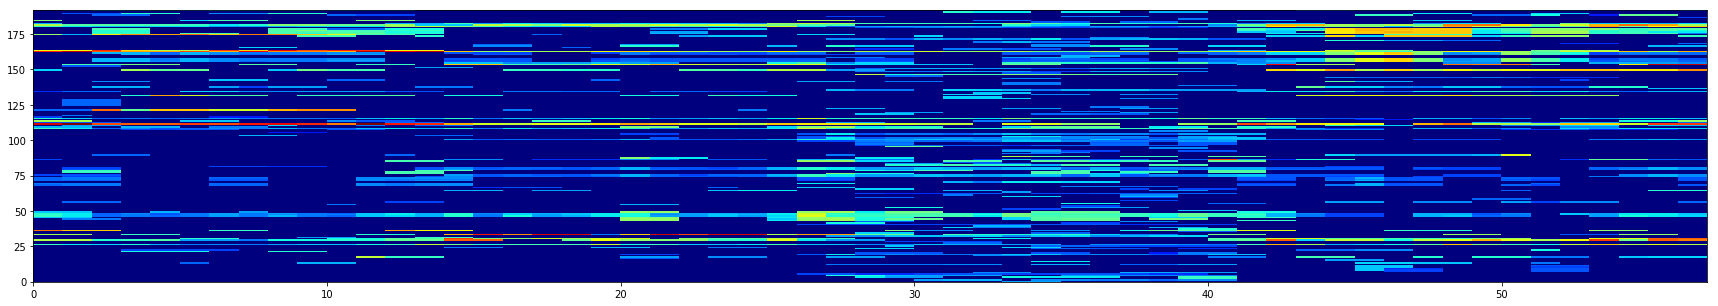

In [443]:
plt.figure(figsize=(30,5))
plt.imshow(df_wifi.T.astype(float),cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_timestamps),0,len(mac_index)], aspect='auto')
plt.savefig("ap.png")

In [444]:
wifi_std = pd.DataFrame()
wifi_std = df_wifi.std(axis=0)

for x in range(0,len(wifi_std)):
    if wifi_std[x] < 0.0: 
        #print wifi_std.index[x]
        df_wifi.drop(wifi_std.index[x], axis=1, inplace=True)

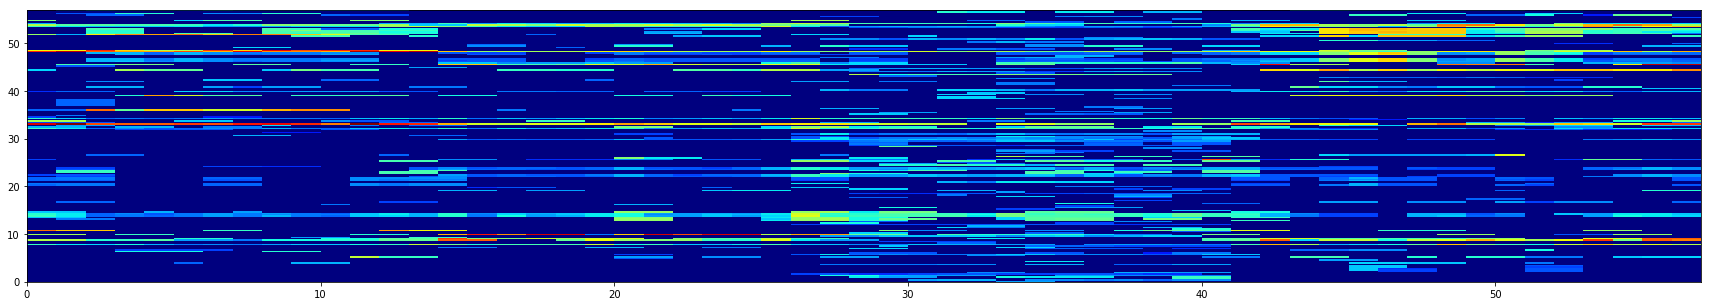

In [445]:
plt.figure(figsize=(30,5))
plt.imshow(df_wifi.T.astype(float),cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_timestamps),0,len(df_wifi)], aspect='auto')
#plt.savefig("ap.png")

# Wifi distance matrix calculation

In [446]:
wifi_level = df_wifi.values

In [447]:
wifi_level[0]

array([-100, -100, -100, -100, -100, -100, -100,  -73, -100,  -84,  -70,
        -78, -100, -100, -100, -100, -100,  -72, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100,  -66,  -54, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100,  -82, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100,  -91, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100,  -88, -100, -100, -100, -100,  -90,  -79,
       -100,  -71,  -90,  -51, -100,  -84,  -78, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100,  -90, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100,  -90, -100,  -88,  -88,  -88,
       -100,  -87,  -88, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,  -83,
        -79,  -79,  -78,  -83, -100, -100, -100, -1

In [448]:
wifi_level

array([[-100, -100, -100, ..., -100, -100, -100],
       [ -89, -100,  -89, ..., -100, -100, -100],
       [ -83, -100,  -89, ..., -100, -100, -100],
       ...,
       [ -91, -100, -100, ..., -100, -100, -100],
       [ -89, -100, -100, ..., -100, -100, -100],
       [ -86, -100, -100, ..., -100, -100, -100]])

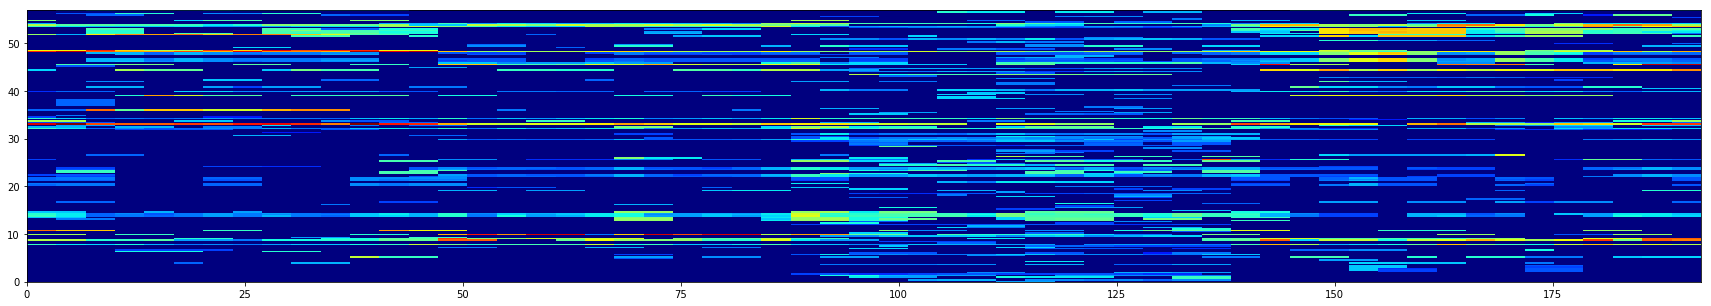

In [449]:
plt.figure(figsize=(30,5))
plt.imshow(df_wifi.T.astype(float),cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(df_wifi.T),0,len(df_wifi)], aspect='auto')

In [450]:
wifi_level

array([[-100, -100, -100, ..., -100, -100, -100],
       [ -89, -100,  -89, ..., -100, -100, -100],
       [ -83, -100,  -89, ..., -100, -100, -100],
       ...,
       [ -91, -100, -100, ..., -100, -100, -100],
       [ -89, -100, -100, ..., -100, -100, -100],
       [ -86, -100, -100, ..., -100, -100, -100]])

In [451]:
wifi_level[:,0]

array([-100,  -89,  -83,  -85,  -85,  -86,  -82,  -86,  -86,  -86,  -85,
        -86,  -86, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,  -85,
        -85,  -87,  -88,  -88,  -88,  -87,  -86,  -91,  -87,  -91,  -91,
        -89,  -86])

In [452]:
len(wifi_level.T)

192

In [453]:
dist1 = 0
wifi_dist_mat = []
wid, leng = wifi_level.shape

num_aps = float(wid)
for scans1 in range(0,len(wifi_level)):
    dist_row = []
    for scans2 in range(0,len(wifi_level)):
        dist_row.append(float(sum(np.abs(wifi_level[scans1,:]-wifi_level[scans2,:])))/num_aps)
    wifi_dist_mat.append(dist_row)    



In [454]:
np.asarray(wifi_dist_mat).shape

(57, 57)

In [455]:
np.asarray(wifi_dist_mat)

array([[ 0.        ,  6.71929825, 13.54385965, ..., 12.87719298,
        14.94736842, 14.22807018],
       [ 6.71929825,  0.        ,  7.98245614, ..., 14.96491228,
        16.40350877, 15.15789474],
       [13.54385965,  7.98245614,  0.        , ..., 13.89473684,
        16.07017544, 14.71929825],
       ...,
       [12.87719298, 14.96491228, 13.89473684, ...,  0.        ,
         4.21052632,  7.73684211],
       [14.94736842, 16.40350877, 16.07017544, ...,  4.21052632,
         0.        ,  4.50877193],
       [14.22807018, 15.15789474, 14.71929825, ...,  7.73684211,
         4.50877193,  0.        ]])

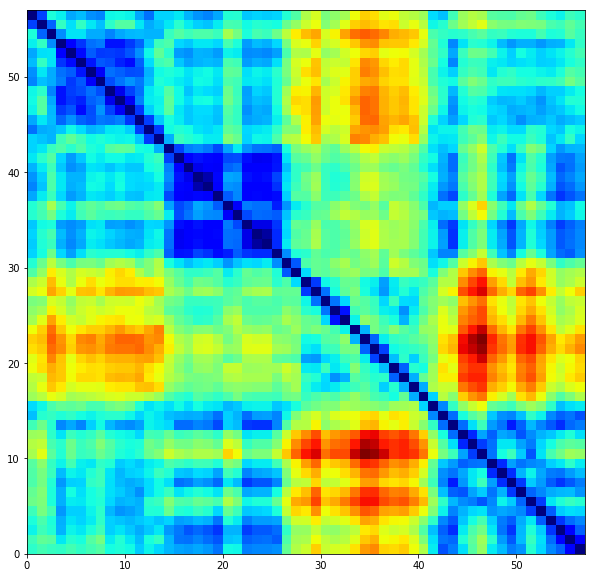

In [456]:
plt.figure(figsize=(10,10))
plt.imshow(wifi_dist_mat,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_level),0,len(wifi_level)], aspect='auto')
#plt.savefig("ap.png")

In [457]:
len(wifi_dist_mat)

57

In [458]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

wifi_dist_array = ssd.squareform(wifi_dist_mat)

Z = linkage(wifi_dist_array, method='ward', metric='euclidean', optimal_ordering=True)

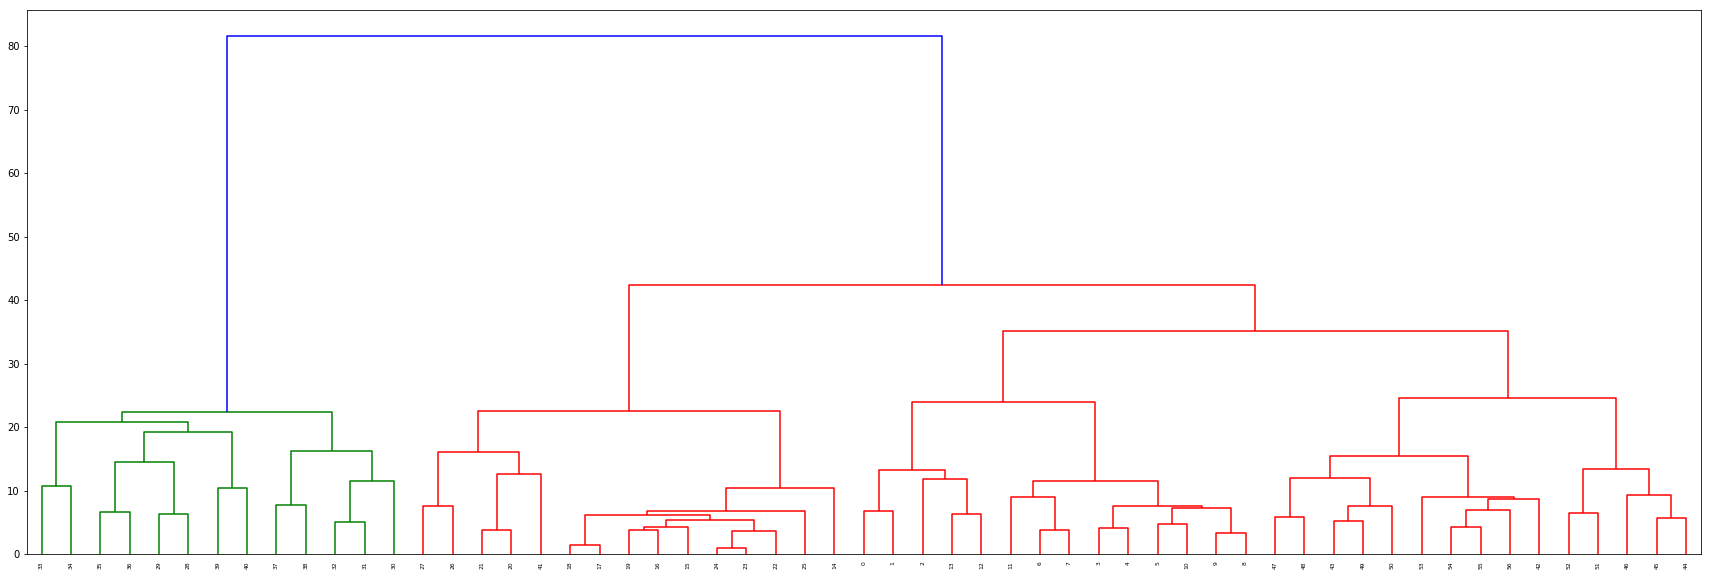

In [459]:
plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [460]:
t = 0.3*max(Z[:,2])
place_clusters = fcluster(Z, t, criterion="distance")

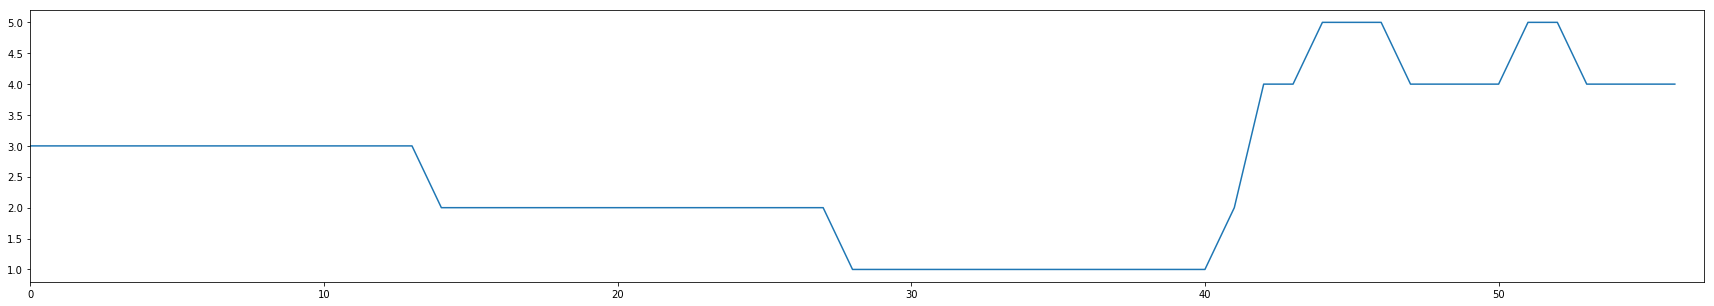

In [461]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(place_clusters))
plt.plot(place_clusters)

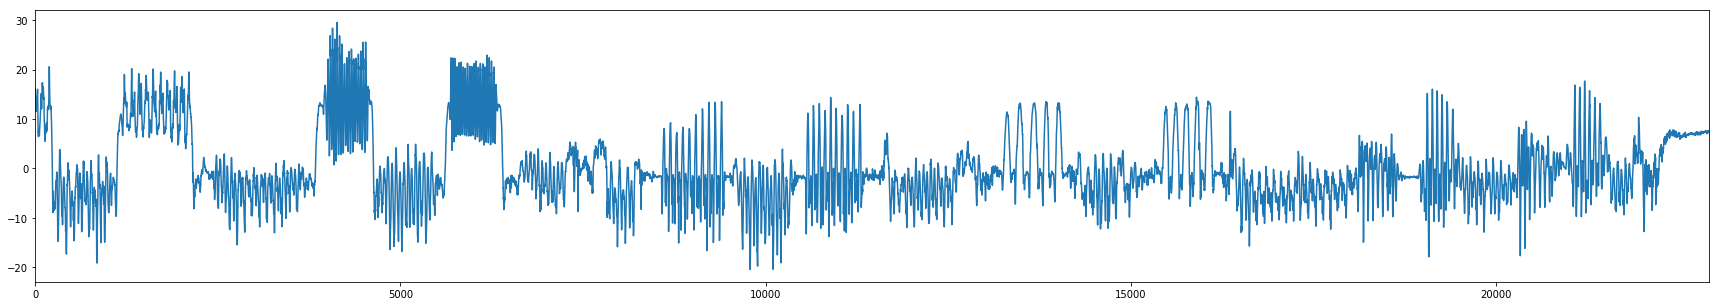

In [462]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc))
plt.plot(acc)
plt.show()

In [563]:
place_cluster = labels.values

# Acceleration resampling

In [513]:
dacc = pd.DataFrame(signal.resample(acc, 5000))
temp_acc = acc
acc = dacc

# Resampling

In [514]:
def resampling_trimming(sen1, sen2):
    max_len_sen = sen1
    min_len_sen = sen2
    
    if len(max_len_sen) <= len(sen2):
        max_len_sen = sen2
        min_len_sen = sen1
        
    # Remove dataframes with timestamps that doesn't match with the given datetime format
    for stmp in min_len_sen.index:
        try:
            datetime.strptime(stmp,'%Y%m%d_%H:%M:%S.%f')
        except ValueError:
            min_len_sen.drop(stmp,axis=0,inplace=True)
            #raise ValueError("Incorrect data format, should be YYYY-MM-DD")

    for stmp2 in max_len_sen.index:
        try:
            datetime.strptime(stmp2,'%Y%m%d_%H:%M:%S.%f')
        except ValueError:
            max_len_sen.drop(stmp2,axis=0,inplace=True)
            

    #Triming off the excess timestamps from the frontend of the sensordata
    print "acc2 start = ",max_len_sen.index[0]
    print "acc_w start = ",min_len_sen.index[0]

    print "Trimming..."

    if pd.to_datetime(max_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f') > pd.to_datetime(min_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f'): #if acc2 starts after acc_w
        min_timestamp = min(pd.to_datetime(min_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(max_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f'))) #find the closest timestamp in acc2 to acc_w[0]
        for items in min_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items < min_timestamp:
                min_len_sen.drop(str(items),inplace=True)

    else: 
        min_timestamp = min(pd.to_datetime(max_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(min_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f')))
        for items in max_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items < min_timestamp:
                max_len_sen.drop(str(items),inplace=True)

    print "acc2 start = ",max_len_sen.index[0]
    print "acc_w start = ",min_len_sen.index[0]      
    print "\n"

    
    #Triming off the excess timestamps from the backend of the sensordata
    print "acc2 end = ",max_len_sen.index[len(max_len_sen)-1]
    print "acc_w end = ",min_len_sen.index[len(min_len_sen)-1]

    print "Trimming..."

    if pd.to_datetime(max_len_sen.index[len(max_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f') < pd.to_datetime(min_len_sen.index[len(min_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f'): #if acc2 ends before acc_w
        min_timestamp = min(pd.to_datetime(min_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(max_len_sen.index[len(max_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f'))) #find the closest timestamp in acc2 to acc_w[0]
        for items in min_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items > min_timestamp:
                min_len_sen.drop(str(items),inplace=True)

    else: 
        min_timestamp = min(pd.to_datetime(max_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(min_len_sen.index[len(min_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f')))
        for items in max_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items > min_timestamp:
                max_len_sen.drop(str(items),inplace=True)

    print "acc2 end = ",max_len_sen.index[len(max_len_sen)-1]
    print "acc_w end = ",min_len_sen.index[len(min_len_sen)-1]
    
    return max_len_sen, min_len_sen

In [515]:
def resampling_repeating(sen1, sen2):
    print len(sen1)
    print len(sen2)
    
    max_len_sen = sen1
    min_len_sen = sen2
    
    if len(max_len_sen) <= len(sen2):
        max_len_sen = sen2
        min_len_sen = sen1
        
    samples_needed = np.abs(len(max_len_sen) - len(min_len_sen))
    #sample_repetitions = float(len(min_len_sen))/float(samples_needed)
    
    
    print "Samples needed = ",samples_needed
    #print "Sample repetitions = ", sample_repetitions
    
    if float(len(max_len_sen))/2>=float(len(min_len_sen)):
        sample_repetitions = float(samples_needed)/float(len(min_len_sen))
        print "Sample repetitions = ", sample_repetitions
        for i in tqdm(range(0,len(min_len_sen))):
            #if i%int(sample_repetitions)==0:
            min_len_sen = pd.concat([min_len_sen]+[min_len_sen.iloc[i:i+1,]]*int(sample_repetitions))
            
    elif float(len(max_len_sen))/2<float(len(min_len_sen)):
        sample_repetitions = float(len(min_len_sen))/float(samples_needed)
        print "Sample repetitions = ", sample_repetitions
        for i in tqdm(range(0,len(min_len_sen))):
            if i%int(sample_repetitions)==0:
                min_len_sen = pd.concat([min_len_sen]+[min_len_sen.iloc[i:i+1,]])
            
    print len(max_len_sen)
    print len(min_len_sen)
    
    return max_len_sen, min_len_sen

In [516]:
def repeat(sen1, sen2):
    if(len(sen1) == len(sen2)): 
        return sen1, sen2
    else:
        sen1, sen2 = resampling_repeating(sen1, sen2)
        if(len(sen1) == len(sen2)): 
            return sen1, sen2
        return repeat(sen1, sen2)

In [517]:
sen11, sen22 = repeat(pd.DataFrame(acc), pd.DataFrame(place_clusters))

100%|██████████| 5000/5000 [00:00<00:00, 337016.41it/s]

5000
5002
Samples needed =  2
Sample repetitions =  2500.0
5002
5002


In [518]:
if np.dtype(sen11[0]) == "int32":
    place_cluster = sen11
    acc = sen22
else:
    place_cluster = sen22
    acc = sen11

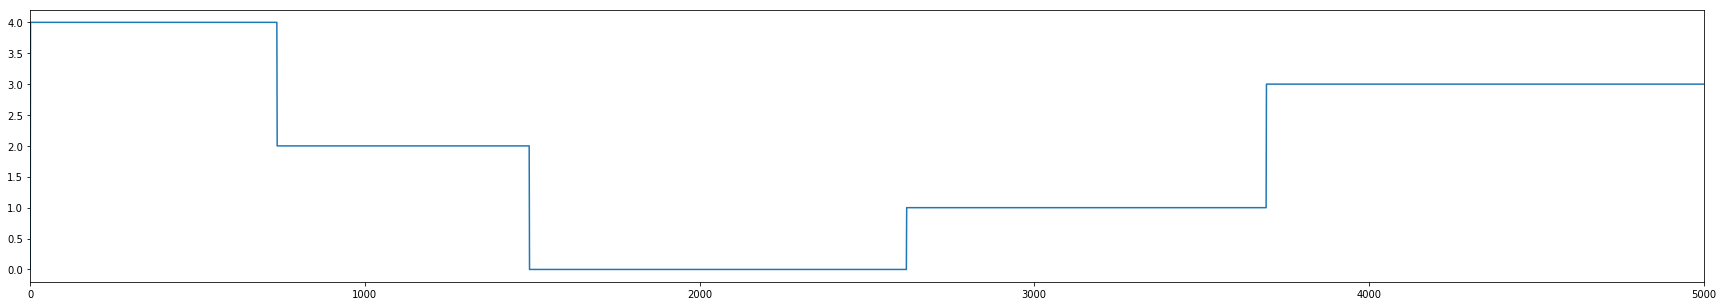

In [519]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc.values))
plt.plot(acc.values)
plt.show()

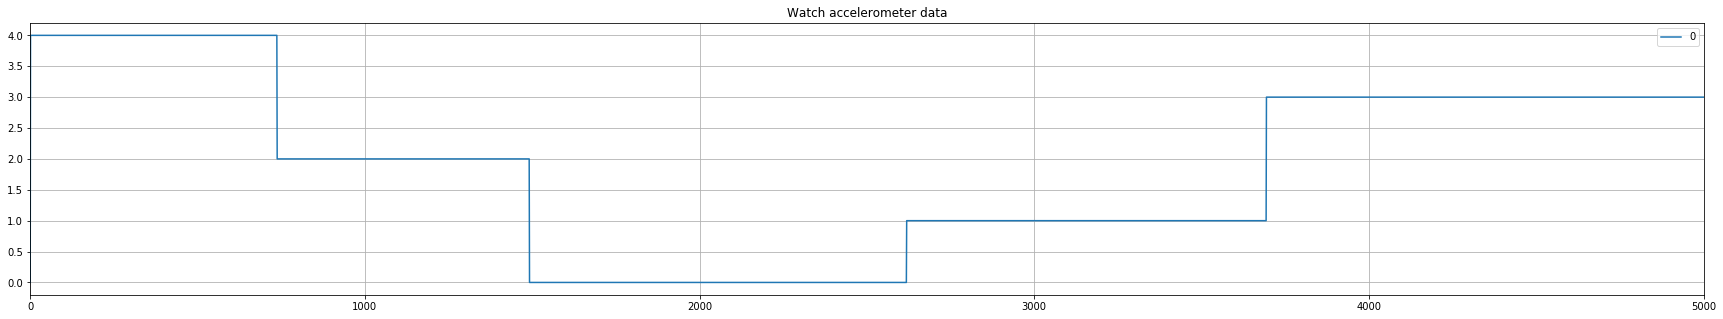

In [521]:
acc.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])
plt.savefig("paper/5/acc.png")

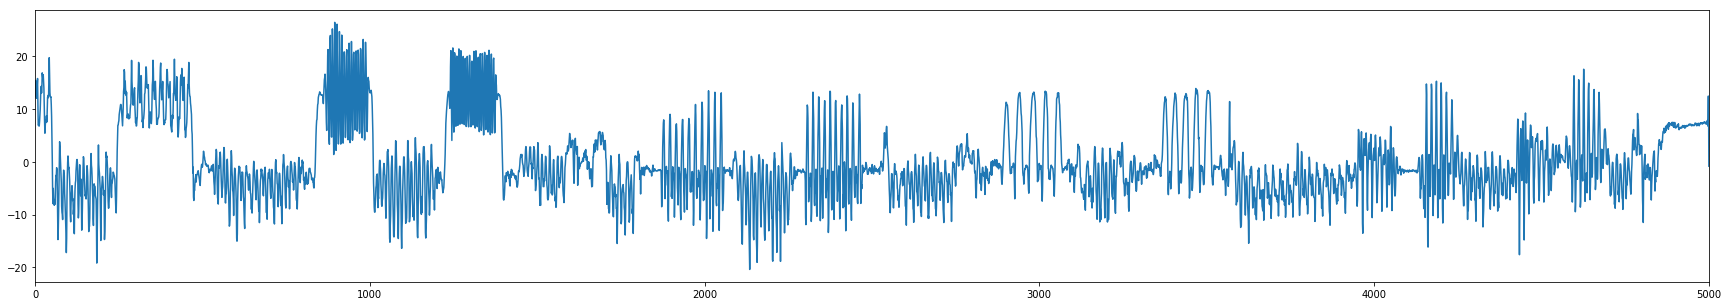

In [522]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(place_cluster.values))
plt.plot(place_cluster.values)
plt.show()

In [565]:
place_cluster = pd.DataFrame(place_cluster)

In [566]:
place_cluster = place_cluster.values.reshape(-1).tolist()
places = set(place_cluster)

place = []
for p in places:
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)
            

In [567]:
places

{0, 1, 2, 3, 4}

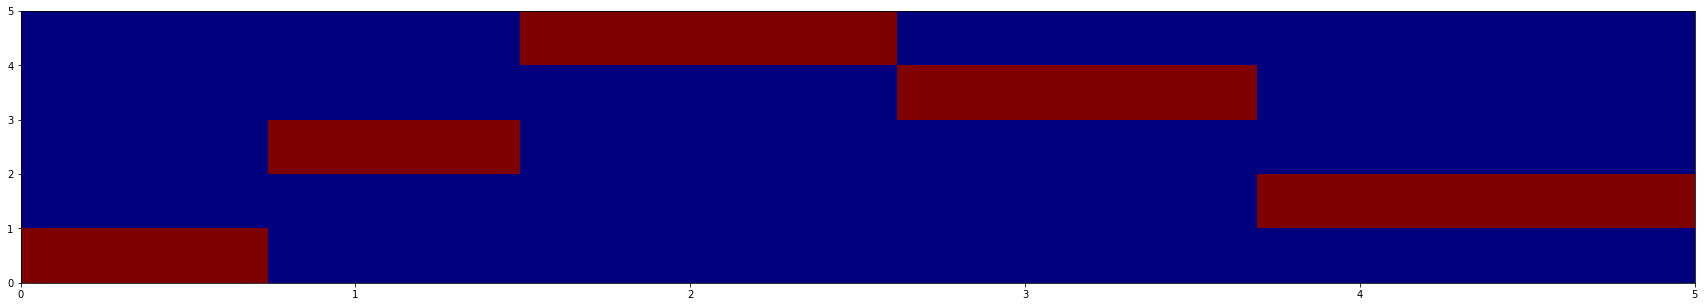

In [568]:
plt.figure(figsize=(30,5))
plt.imshow(place,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(places),0,len(place)], aspect='auto')

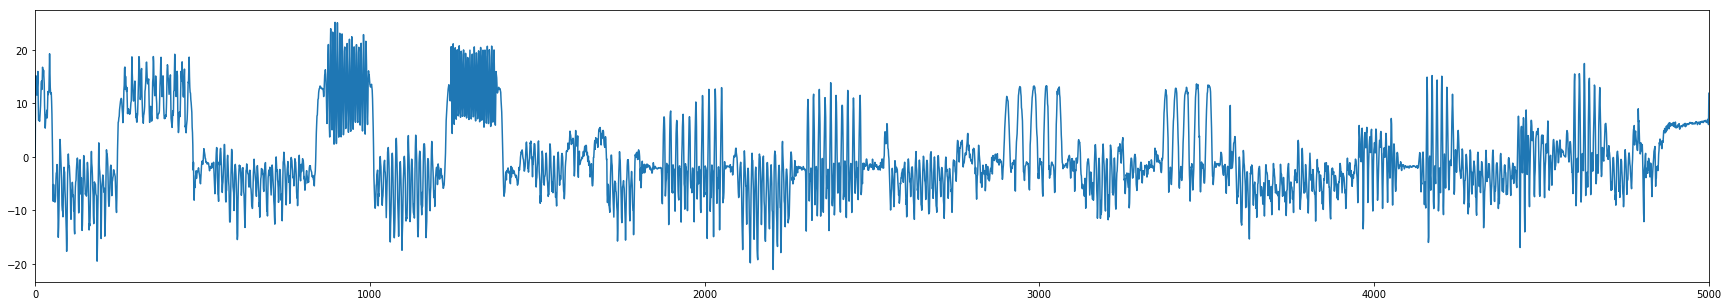

In [569]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc))
plt.plot(acc)
plt.show()

# Acceleration distance matrix calculation

In [570]:
window_len = 100
from sklearn import preprocessing
#Euclidian distance (edges have to be filled with zeros)
window_len = window_len
dist_mat = []
#std = []
y_window = []

acc_max = acc.max()
acc_min = acc.min()

for z in tqdm(range(0,len(acc)-window_len)):
    #std.append(acc[z:window_len+z].std())
    #avg.append(acc[z:window_len+z].mean())
    y_window.append((acc[z:window_len+z] - acc[z:window_len+z].mean() )/acc[z:window_len+z].std())


for y in tqdm(range(0,len(acc)-window_len)):
    feature = []
    #feature.extend(np.zeros(window_len/2))
    feature.extend(np.full((1, (window_len/2)), acc_max-acc_min).tolist()[0])
    #y_window = (acc[y:window_len+y] - avg[y])/std[y]
    for x in range(0,len(acc)-window_len):
        feature.append(distance.euclidean(y_window[y],y_window[x]))

    feature.extend(np.full((1, (window_len/2)), acc_max-acc_min).tolist()[0])
        
    dist_mat.append(feature)

100%|██████████| 4902/4902 [24:49<00:00,  3.17it/s]


In [571]:
acc_dist_mat = []
for n in range(0,window_len/2):
    #acc_dist_mat.append(np.zeros(len(np.array(dist_mat).T)).tolist())
    acc_dist_mat.append(np.full((1, len(np.array(dist_mat).T)), acc_max-acc_min).tolist()[0])
    
for line in dist_mat:
    acc_dist_mat.append(line)

for n in range(0,window_len/2):
    #acc_dist_mat.append(np.zeros(len(np.array(dist_mat).T)).tolist())
    acc_dist_mat.append(np.full((1, len(np.array(dist_mat).T)), acc_max-acc_min).tolist()[0])

In [572]:
np.asarray(acc_dist_mat).shape

(5002, 5002)

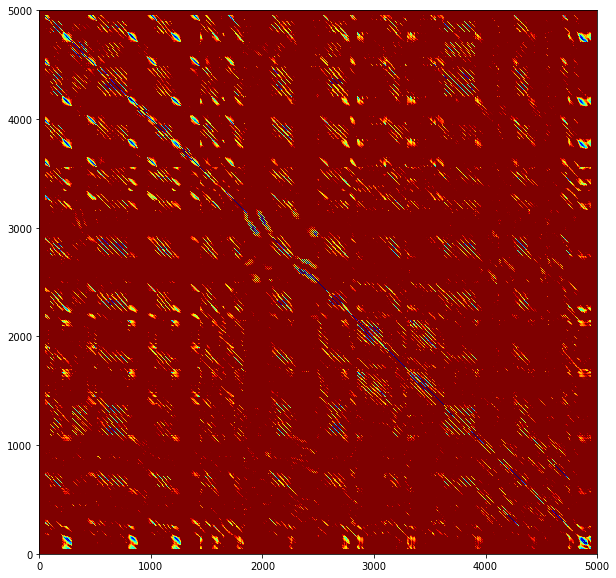

In [573]:
plt.figure(figsize=(10,10))
plt.imshow(acc_dist_mat, cmap='jet', vmax=12, vmin=5, interpolation='nearest', origin='upper', extent=[0,len(acc_dist_mat),0,len(acc_dist_mat)], aspect='auto')
#plt.colorbar()

In [574]:
max_dist = np.array(acc_dist_mat).max()
similarity_matrix = []
for feature in acc_dist_mat:
    sim = []
    for element in feature:
        simv=1.0-element/max_dist
        sim.append(simv if simv>0.8 else 0.0)
    similarity_matrix.append(sim)

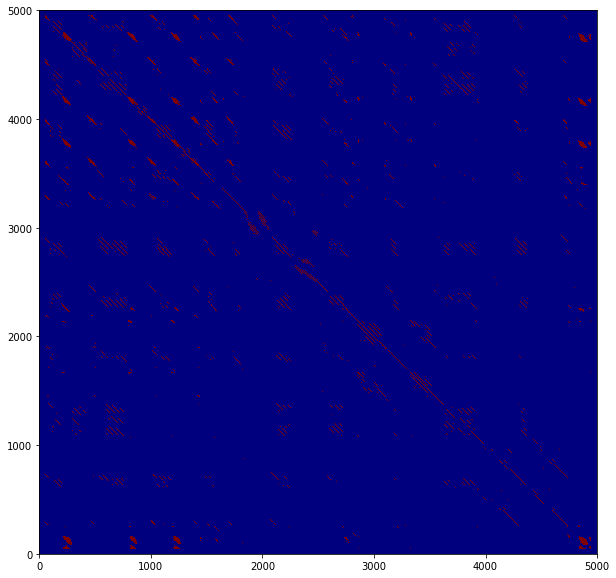

In [575]:
plt.figure(figsize=(10,10))
plt.imshow(similarity_matrix, cmap='jet', vmax=0.8, interpolation='nearest', origin='upper', extent=[0,len(similarity_matrix),0,len(similarity_matrix)], aspect='auto')
#plt.colorbar()

# Calculating Similarity Coefficient

In [576]:
#np.sum([np.multiply(items,place[0])/np.sum(place[0]) , np.multiply(items,place[1])/np.sum(place[1]) , np.multiply(items,place[2])/np.sum(place[2])]))

In [577]:
np.asarray(similarity_matrix[300]).shape

(5002,)

In [578]:
np.asarray(place).shape

(5, 5002)

In [579]:
np.multiply(place, similarity_matrix[300]).shape

(5, 5002)

In [580]:
for m in place:
    for n in m:
        if isinstance(n,float)==True: print "crap"

In [581]:
prob = []
num = 0
for items in np.array(similarity_matrix):
    p = []
    denom_array = []
    for m in range(0,len(places)):
        denom_array.append(np.multiply(place[m],items)/np.sum(place[m]))
        denom = np.sum(denom_array)
    for n in range(0,len(places)):
        if np.sum(np.multiply(items,np.asarray(place))) == 0.0:
            p.append(1.0/len(places))
            #print np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
        else:
            p.append((np.sum(np.multiply(place[n],items))/np.sum(place[n])) / denom)#np.sum([np.multiply(items,place[0])/np.sum(place[0]) , np.multiply(items,place[1])/np.sum(place[1]) , np.multiply(items,place[2])/np.sum(place[2])]))#/np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
    prob.append(p)

prob = []
for items in np.array(similarity_matrix):
    p = []
    for n in range(0,len(places)):
        if np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])]) == 0.0:
            p.append(1.0/len(places))
            #print np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
        else:
            p.append(np.sum(np.multiply(items,place[n]))/np.sum(place[n]) / np.sum([np.multiply(items,place[0])/np.sum(place[0]) , np.multiply(items,place[1])/np.sum(place[1]) , np.multiply(items,place[2])/np.sum(place[2])]))#/np.sum([np.multiply(items,place[0]) , np.multiply(items,place[1]) , np.multiply(items,place[2])])
    prob.append(p)

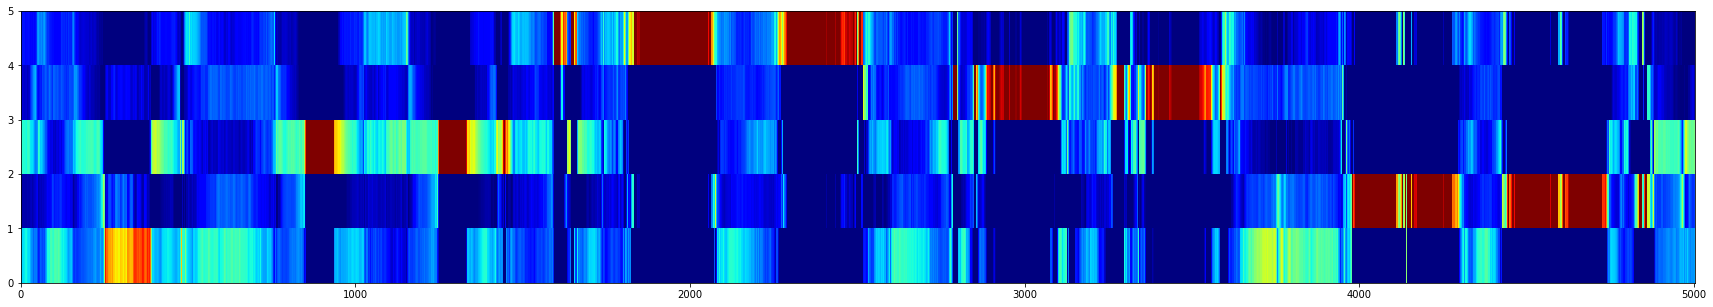

In [582]:
plt.figure(figsize=(30,5))
plt.imshow(np.array(prob)[50:len(similarity_matrix)-50].T,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(prob),0,len(place)], aspect='auto')
#plt.colorbar()

In [583]:
prob_sum = []
for probs in prob:
    prob_sum.append(np.sum(np.power(probs,2)))

In [584]:
gini = []
for items in prob_sum:
    gini.append(1-items)

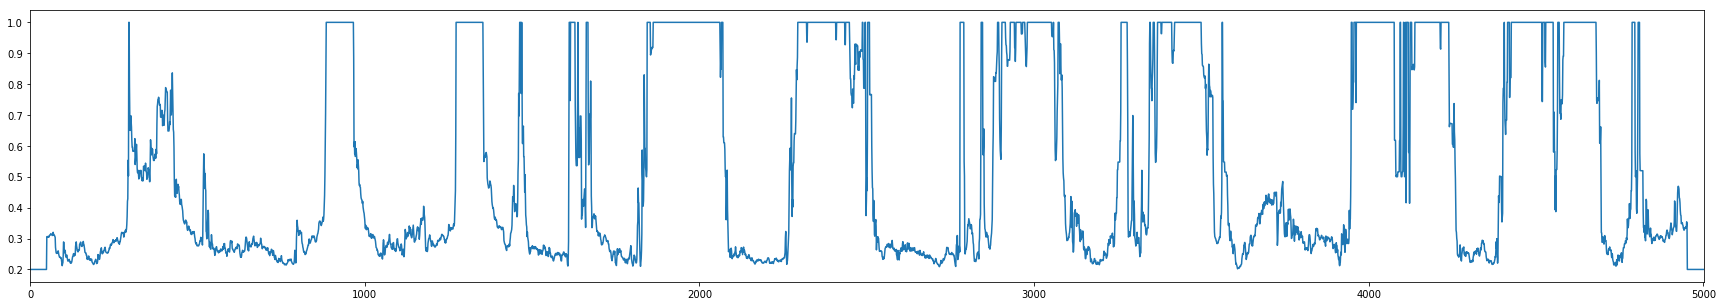

In [585]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(prob_sum))
plt.plot(prob_sum)

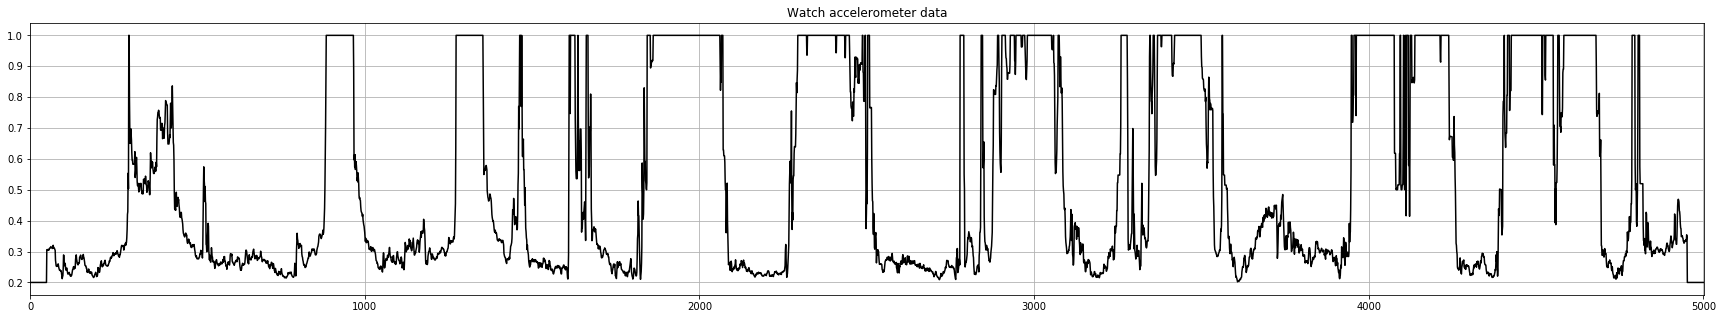

In [586]:
prob_sum2 = pd.DataFrame(prob_sum)
prob_sum2.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(prob_sum2)],color = "k", legend=None)
plt.savefig("paper/"+str(session)+"/lsm.png")

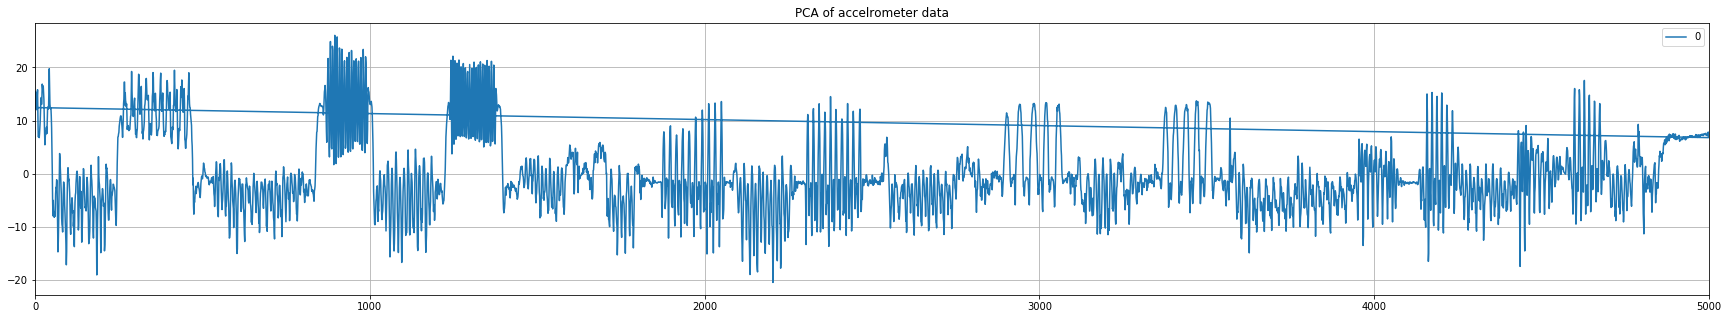

In [199]:
acc.plot(figsize = (30,5),title="PCA of accelrometer data",grid=1,xlim=[0,len(acc)])

# Clustering similarity coefficients

In [200]:
mot_loc = []
for x in range(0,len(prob_sum)):
    if(prob_sum[x]>0.8):
        #mot_loc.append([x,prob_sum[x]])
        mot_loc.append(x)

In [201]:
mot_sim_mat = []
for locs in mot_loc:
    #mot_dist_mat.append(np.array(similarity_matrix[locs])[mot_loc])
    mot_sim_mat.append(np.array(similarity_matrix[locs])[mot_loc])


In [202]:
mot_dist_mat = []
for feature in mot_sim_mat:
    sim = []
    for element in feature:
        sim.append(1.0-element)
    mot_dist_mat.append(sim)

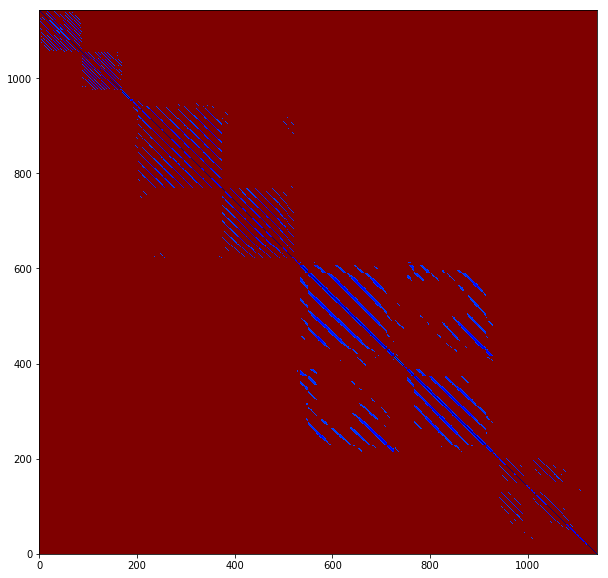

In [203]:
plt.figure(figsize=(10,10))
plt.imshow(mot_dist_mat,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(mot_sim_mat),0,len(mot_sim_mat)], aspect='auto')

In [256]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

mot_dist_array = ssd.squareform(mot_dist_mat)

Z = linkage(mot_dist_array, method='single', metric='euclidean')

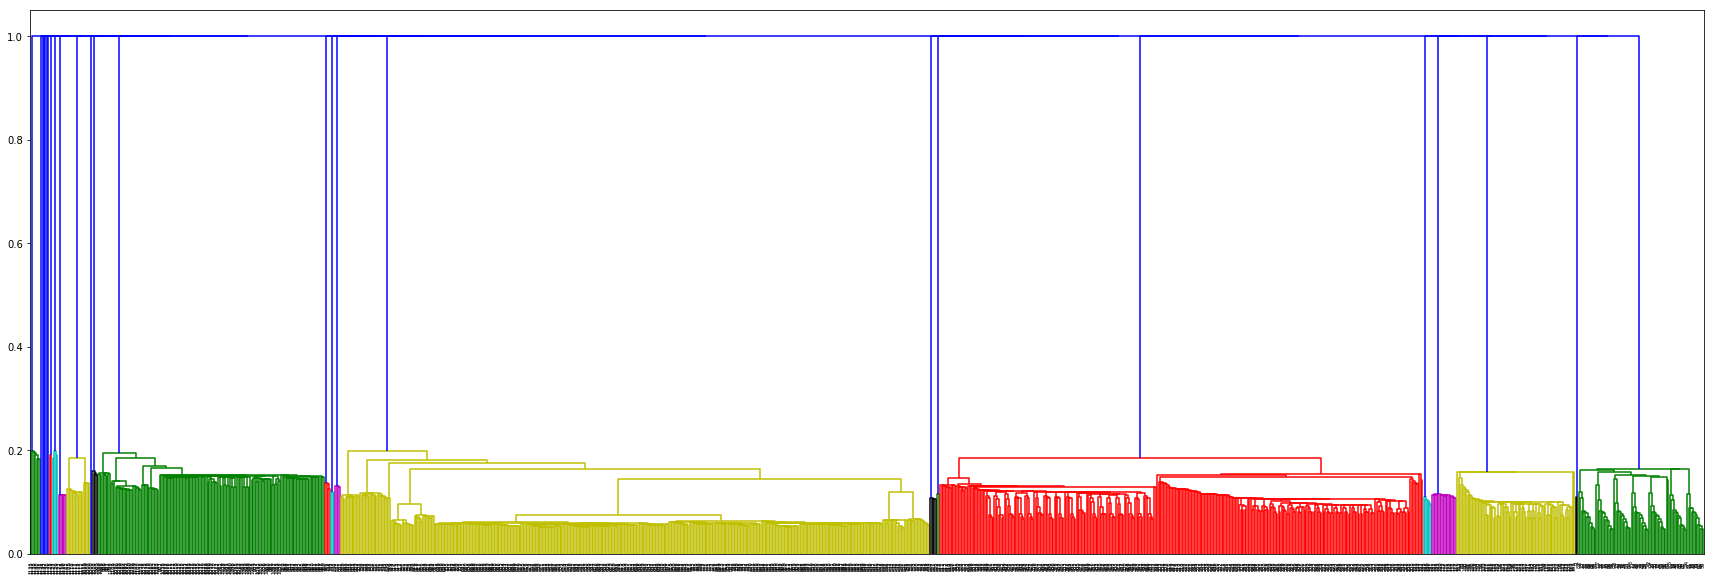

In [257]:
plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [284]:
t = 0.6*max(Z[:,2])
clusters = fcluster(Z, t, criterion="distance")

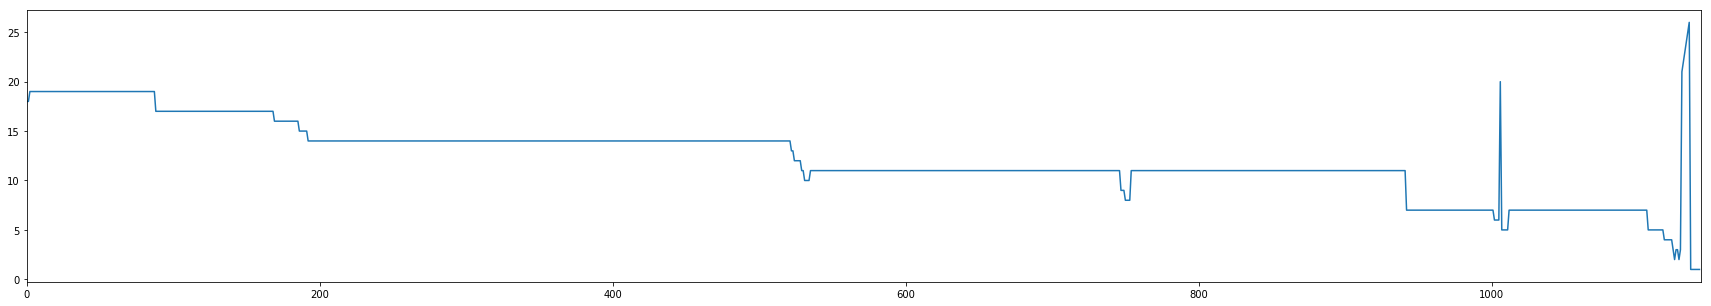

In [285]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(clusters))
plt.plot(clusters)

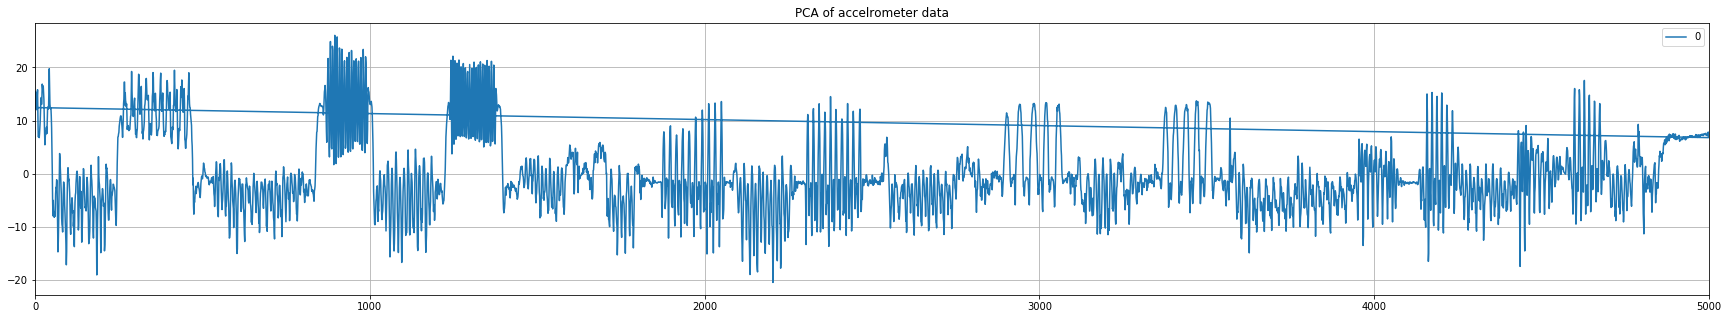

In [286]:
acc.plot(figsize = (30,5),title="PCA of accelrometer data",grid=1,xlim=[0,len(acc)])

In [287]:
cluster_loc = []
for y in range(0,len(mot_loc)):
    cluster_loc.append([mot_loc[y],clusters[y]])

In [288]:
times_cluster = []
for z in range(0,len(acc)):
    times_cluster.extend([0])

In [289]:
for itm in cluster_loc:
    times_cluster[itm[0]] = itm[1]

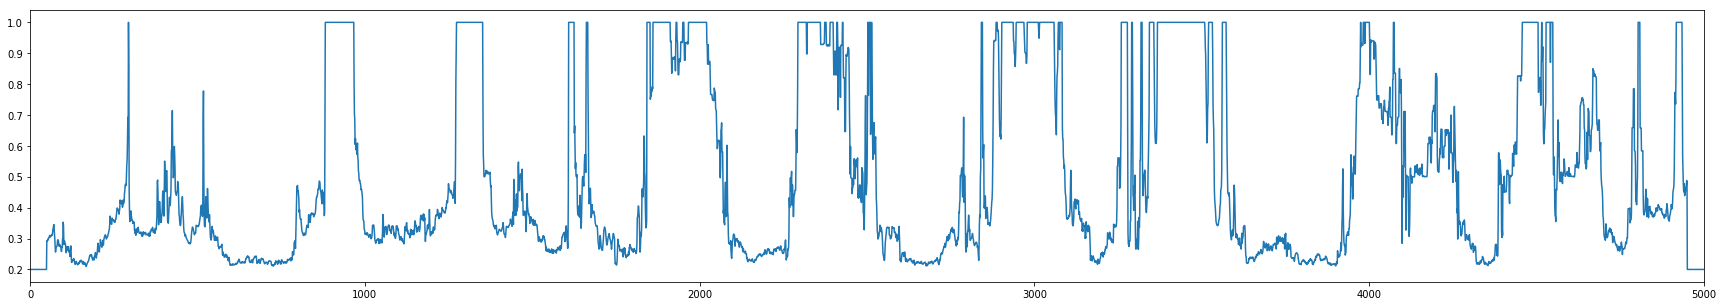

In [290]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(prob_sum))
plt.plot(prob_sum)

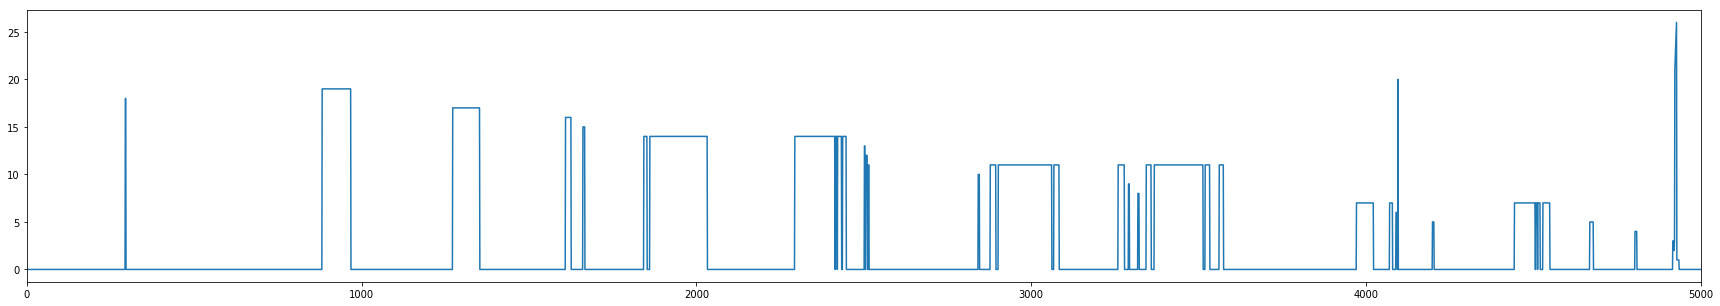

In [291]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(times_cluster))
plt.plot(times_cluster)

In [295]:
place_times_cluster = np.vstack((place_cluster, times_cluster)).T

In [296]:
env_mot_list = []

for env in set(place_cluster):
    #print env
    pmcombo = place_times_cluster[place_times_cluster[:,0]==env]
    mot_list = []
    for motif in set(times_cluster):#set(pmcombo[:,1]):
        envmot = pmcombo[:,1]
        #print int(motif), envmot.tolist().count(motif)
        mot_list.append([int(motif), envmot.tolist().count(motif)])
        
    env_mot_list.append([int(env),mot_list])    
    #for motif in set(times_cluster):
     #   print no, times_cluster.count(no)

In [299]:
motif_occur = []
for no in set(times_cluster):
    if no != 0:
        motif_occur.append([no, times_cluster.count(no)])

In [300]:
motif_occur

[[1, 7],
 [2, 2],
 [3, 4],
 [4, 6],
 [5, 16],
 [6, 4],
 [7, 155],
 [8, 4],
 [9, 3],
 [10, 4],
 [11, 402],
 [12, 5],
 [13, 2],
 [14, 330],
 [15, 6],
 [16, 17],
 [17, 81],
 [18, 2],
 [19, 86],
 [20, 1],
 [21, 1],
 [22, 1],
 [23, 1],
 [24, 1],
 [25, 1],
 [26, 1]]

In [301]:
motif_occur = np.asarray(motif_occur)

In [302]:
mot_sum = float(sum(motif_occur[:,1]))

In [303]:
mot_ratio = []
for mots in motif_occur:
    mot_ratio.append([mots[0],float(mots[1])/mot_sum])

In [304]:
mot_ratio

[[1, 0.006124234470691163],
 [2, 0.0017497812773403325],
 [3, 0.003499562554680665],
 [4, 0.005249343832020997],
 [5, 0.01399825021872266],
 [6, 0.003499562554680665],
 [7, 0.13560804899387577],
 [8, 0.003499562554680665],
 [9, 0.0026246719160104987],
 [10, 0.003499562554680665],
 [11, 0.35170603674540685],
 [12, 0.004374453193350831],
 [13, 0.0017497812773403325],
 [14, 0.2887139107611549],
 [15, 0.005249343832020997],
 [16, 0.014873140857392825],
 [17, 0.07086614173228346],
 [18, 0.0017497812773403325],
 [19, 0.0752405949256343],
 [20, 0.0008748906386701663],
 [21, 0.0008748906386701663],
 [22, 0.0008748906386701663],
 [23, 0.0008748906386701663],
 [24, 0.0008748906386701663],
 [25, 0.0008748906386701663],
 [26, 0.0008748906386701663]]

In [305]:
feature_list = []
for x in range(0,len(env_mot_list)):
    for y in range(0,len(env_mot_list[x][1])):
        feature_list.append([x,y,float(env_mot_list[x][1][y][1])/mot_sum])

In [306]:
feature_list

[[0, 0, 0.6299212598425197],
 [0, 1, 0.0],
 [0, 2, 0.0],
 [0, 3, 0.0],
 [0, 4, 0.0],
 [0, 5, 0.0],
 [0, 6, 0.0],
 [0, 7, 0.0],
 [0, 8, 0.003499562554680665],
 [0, 9, 0.0026246719160104987],
 [0, 10, 0.003499562554680665],
 [0, 11, 0.35170603674540685],
 [0, 12, 0.004374453193350831],
 [0, 13, 0.0017497812773403325],
 [0, 14, 0.0],
 [0, 15, 0.0],
 [0, 16, 0.0],
 [0, 17, 0.0],
 [0, 18, 0.0],
 [0, 19, 0.0],
 [0, 20, 0.0],
 [0, 21, 0.0],
 [0, 22, 0.0],
 [0, 23, 0.0],
 [0, 24, 0.0],
 [0, 25, 0.0],
 [0, 26, 0.0],
 [1, 0, 0.7716535433070866],
 [1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 0.0],
 [1, 5, 0.0],
 [1, 6, 0.0],
 [1, 7, 0.0],
 [1, 8, 0.0],
 [1, 9, 0.0],
 [1, 10, 0.0],
 [1, 11, 0.0],
 [1, 12, 0.0],
 [1, 13, 0.0],
 [1, 14, 0.2887139107611549],
 [1, 15, 0.005249343832020997],
 [1, 16, 0.014873140857392825],
 [1, 17, 0.07086614173228346],
 [1, 18, 0.0],
 [1, 19, 0.0],
 [1, 20, 0.0],
 [1, 21, 0.0],
 [1, 22, 0.0],
 [1, 23, 0.0],
 [1, 24, 0.0],
 [1, 25, 0.0],
 [1, 26, 0.0],
 [2, 0, 0.99

In [307]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [315]:
def f(x):
    return x

In [318]:
for h in range(0,5):
    interact(f, x=len(acc));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MDAxLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MTUwMDMsIG1pbj0tNTAwMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MDAxLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MTUwMDMsIG1pbj0tNTAwMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MDAxLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MTUwMDMsIG1pbj0tNTAwMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MDAxLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MTUwMDMsIG1pbj0tNTAwMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MDAxLCBkZXNjcmlwdGlvbj11J3gnLCBtYXg9MTUwMDMsIG1pbj0tNTAwMSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


In [327]:
widgets.IntRangeSlider(
    value=[0, len(acc)],
    min=0,
    max=len(acc),
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(0, 5001), continuous_update=False, max=5001)

In [334]:
from ipywidgets import HBox, Label, Layout

HBox([Layout(width='700px'),widgets.IntRangeSlider(value=[0, len(acc)],
    min=0,
    max=len(acc),
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',)])

In [338]:
HBox([Layout(height='1000px'), widgets.IntRangeSlider()])

In [349]:
y = widgets.IntRangeSlider(value=[0, len(acc)],
    min=0,
    max=len(acc),
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',)

In [350]:
y

IntRangeSlider(value=(0, 5001), continuous_update=False, max=5001)

In [346]:
y

IntRangeSlider(value=(1165, 3784), continuous_update=False, max=5001)

In [351]:
print y.value

(1448, 3454)
